EN2550 Fundamentals of Image Processing and Machine
Vision: Point Operations 
Lecture -02

Code for Generating a 6 × 8 Images

In [2]:
import cv2 as cv

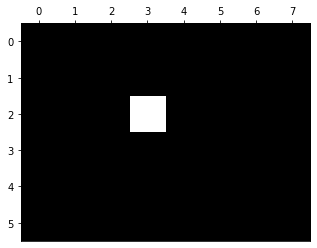

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im=np.zeros((6,8),dtype=np.uint8)
im[2,3] = 255
fig,ax = plt.subplots()
ax.imshow(im,cmap='gray',vmin =0,vmax=255)
ax.xaxis.tick_top()
plt.show()


[255 255 100]


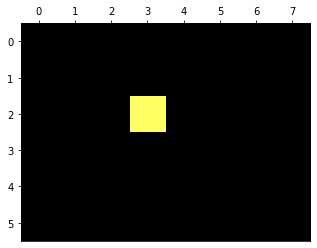

In [5]:
#Listing: A Color Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = np.zeros((6,8,3),dtype=np.uint8)
im[2,3] = [255, 255, 100]
print(im[2,3])
fig,ax =plt.subplots()
ax.imshow(im)
ax.xaxis.tick_top( )
plt.show( )

Displaying Image Properties

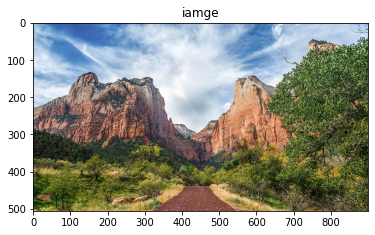

(506, 900, 3)
1366200
uint8


In [6]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('zion_pass.jpg',cv.IMREAD_COLOR)
img =cv.cvtColor(img,cv.COLOR_BGR2RGB)

fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('iamge')
plt.show()

print(img.shape)
print(img.size)
print(img.dtype)

Increasing the Brightness Using OpenCV

Text(0.5, 1.0, 'cv add image')

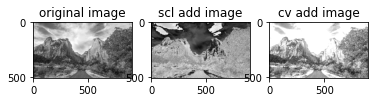

In [10]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt

img =cv.imread('zion_pass.jpg',cv.IMREAD_GRAYSCALE)
imgb = img+100                           ## overflow occured
imgc = cv.add(img,100)

fig, ax =plt.subplots(1,3)
ax[0].imshow(img,cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(imgb,cmap='gray')
ax[1].set_title('scl add image')
ax[2].imshow(imgc,cmap='gray')
ax[2].set_title('cv add image')


Increasing the Brightness Using Loops I

Text(0.5, 1.0, 'brighten image')

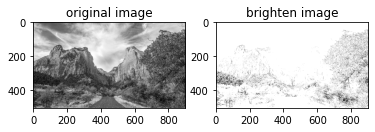

In [13]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def brightten(image,shift):
    h=image.shape[0]
    w=image.shape[1]

    result =np.zeros(image.shape,image.dtype)

    for i in range(0,h):
        for j in range(0,w):
            no_overflow = True if image[i,j] + shift < 255 else False
            result[i,j] = min(image[i,j] + shift, 255) if no_overflow else 255
    return result


img =cv.imread('zion_pass.jpg',cv.IMREAD_GRAYSCALE)
imgb = brightten ( img , 200)
fig, ax =plt.subplots(1,2)
ax[0].imshow(img,cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(imgb,cmap='gray')
ax[1].set_title('brighten image')

Zeroing Out Green and Blue Planes

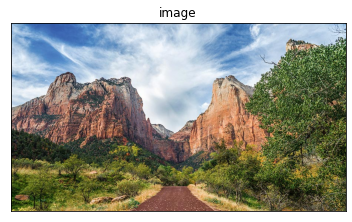

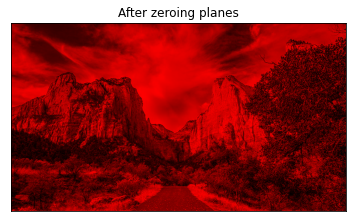

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img =cv.imread('zion_pass.jpg',cv.IMREAD_ANYCOLOR)

if img is None:
    print('image could not be read')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('image')
plt.xticks([]),plt.yticks([])
plt.show()

img[:,:,1:3]=0
plt.imshow(img)
plt.title('After zeroing planes')
plt.xticks([]),plt.yticks([])
plt.show()


Intensity Transforms: Identity Transformation Code I

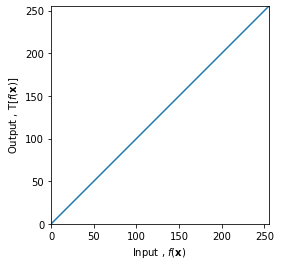

(506, 900)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

transform = np.arange(0, 256).astype('uint8')
fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax.set_ylabel('Output , $\mathrm{T } [ f ( \mathbf { x } ) ] $')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_org =cv.imread('zion_pass.jpg', cv.IMREAD_GRAYSCALE)
print(img_org.shape)
cv.namedWindow('image',cv.WINDOW_AUTOSIZE)
cv.imshow('image', img_org)
cv.waitKey(0)
image_transformed = cv.LUT(img_org, transform)   ## look up table
cv.imshow( 'Image ' , image_transformed )
cv.waitKey (0)
cv.destroyAllWindows ( )

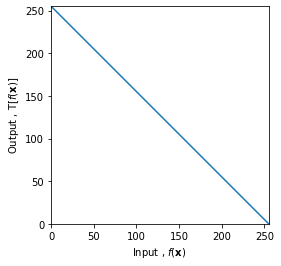

(506, 900)


In [4]:
transform = np.arange(255,-1, -1).astype('uint8')
fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax.set_ylabel('Output , $\mathrm{T } [ f ( \mathbf { x } ) ] $')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_org =cv.imread('zion_pass.jpg', cv.IMREAD_GRAYSCALE)
print(img_org.shape)
cv.namedWindow('image',cv.WINDOW_AUTOSIZE)
cv.imshow('image', img_org)
cv.waitKey(0)
image_transformed = cv.LUT(img_org, transform)
cv.imshow( 'Image ' , image_transformed )
cv.waitKey (0)
cv.destroyAllWindows ( )

Intensity Transforms: Intensity Windowing I

101
50
105
256


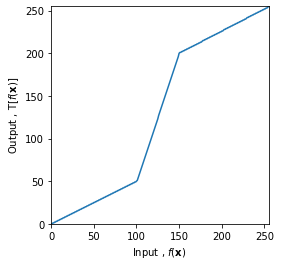

(506, 900)


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

c=np.array([(100,50),(150,200)])

t1=np.linspace(0,c[0,1],c[0,0]+1).astype('uint8')
print(len(t1))

t2=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
print(len(t2))

t3=np.linspace(c[1,1]+1,255,255-c[1,0]).astype('uint8')
print(len(t3))

transform= np.concatenate((t1,t2),axis=0).astype('uint8')
transform= np.concatenate((transform,t3),axis=0).astype('uint8')
print(len(transform))

fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax.set_ylabel('Output , $\mathrm{T } [ f ( \mathbf { x } ) ] $')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_org =cv.imread('zion_pass.jpg', cv.IMREAD_GRAYSCALE)
print(img_org.shape)
cv.namedWindow('image',cv.WINDOW_AUTOSIZE)
cv.imshow('image', img_org)
cv.waitKey(0)
image_transformed = cv.LUT(img_org, transform)
cv.imshow( 'Image ' , image_transformed )
cv.waitKey (0)
cv.destroyAllWindows ( )


Histograms Using OpenCV

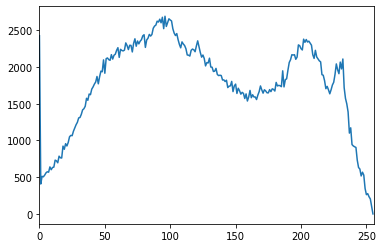

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = cv.imread('zion_pass.jpg', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img],[0],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,256])
plt.show()



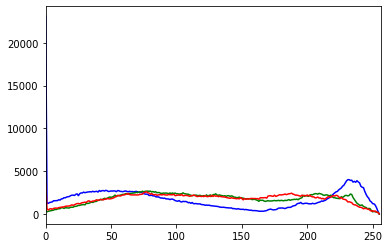

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = cv.imread('zion_pass.jpg', cv.IMREAD_COLOR)
color = ('b','g','r')
for i,c in enumerate(color):
    hist = cv.calcHist([img],[i],None,[256],[0,255])
    plt.plot(hist, color=c)
    plt.xlim([0,256])
plt.show()


Histogram Equalization I

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = cv.imread('zion_pass.jpg', cv.IMREAD_GRAYSCALE)

g = cv.equalizeHist(img)
hist_g=